In [8]:
import pandas as pd #library yang digunakan untuk menganalisis data serta membangun sebuah machine learning
import sklearn #library yang digunakan untuk membantu melakukan processing data ataupun melakukan training data
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('C:/Users/User/Downloads/archive/Jan_2019_ontime.csv') #import file csv

In [10]:
column = ['OP_UNIQUE_CARRIER', 'OP_CARRIER', 'TAIL_NUM', 'DEST', 'ORIGIN', 'DEP_TIME', 'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'DIVERTED', 'DISTANCE' ]

df = data.drop(columns = column) #menghapus kolom yang dipilih
df.head(10)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CANCELLED
0,1,2,20363,3280,11953,10397,0
1,1,2,20363,3281,13487,11193,0
2,1,2,20363,3282,11433,11193,0
3,1,2,20363,3283,15249,10397,0
4,1,2,20363,3284,10397,11778,0
5,1,2,20363,3285,11267,13487,0
6,1,2,20363,3286,12448,10397,0
7,1,2,20363,3287,12953,11193,0
8,1,2,20363,3288,12451,12953,0
9,1,2,20363,3289,10397,10685,0


In [11]:
array = df.values #membuat array
X = array [:, 0:6]
Y = array [:, 6]
array

array([[    1,     2, 20363, ..., 11953, 10397,     0],
       [    1,     2, 20363, ..., 13487, 11193,     0],
       [    1,     2, 20363, ..., 11433, 11193,     0],
       ...,
       [   31,     4, 19977, ..., 14955, 12016,     0],
       [   31,     4, 19977, ..., 14955, 12016,     0],
       [   31,     4, 19977, ..., 12016, 14955,     0]], dtype=int64)

In [12]:
kfold=KFold(n_splits=5, random_state=0, shuffle=True) #Pengecekan akurasi dengan menentukan datatest atau nilai yang akan diuji, dan data acak
model = DecisionTreeClassifier()

In [15]:
result=cross_val_score(model, X, Y, cv=kfold) #Hasil akurasi, X, Y
print(result)

[0.9639888  0.96350934 0.96493061 0.96374907 0.96435696]


In [16]:
print(result.mean())

0.9641069548019212


In [17]:
Data = [[1, 2, 20363, 3280, 11953, 10397],
        [2, 3, 20363, 3282, 11433, 11193],
        [4, 5, 20363, 3280, 11953, 10397]]
model.fit(X,Y)
y_pred = model.predict(Data)

print("hasil dari prediksi : Class", y_pred) #Memprediksi class

hasil dari prediksi : Class [0 0 0]


[Text(0.6109225590970951, 0.9886363636363636, 'X[0] <= 27.5\ngini = 0.056\nsamples = 583985\nvalue = [567259, 16726]'),
 Text(0.3633575175996754, 0.9659090909090909, 'X[0] <= 18.5\ngini = 0.039\nsamples = 506325\nvalue = [496124, 10201]'),
 Text(0.20825286360043205, 0.9431818181818182, 'X[3] <= 4186.5\ngini = 0.025\nsamples = 343402\nvalue = [339111, 4291]'),
 Text(0.0910018489688286, 0.9204545454545454, 'X[2] <= 19541.5\ngini = 0.017\nsamples = 271101\nvalue = [268784, 2317]'),
 Text(0.03447915328847419, 0.8977272727272727, 'X[0] <= 10.5\ngini = 0.03\nsamples = 56720\nvalue = [55847, 873]'),
 Text(0.008494066729431721, 0.875, 'X[0] <= 7.5\ngini = 0.015\nsamples = 31219\nvalue = [30990, 229]'),
 Text(0.0019042377298702632, 0.8522727272727273, 'X[3] <= 44.5\ngini = 0.01\nsamples = 20499\nvalue = [20401, 98]'),
 Text(0.0004287507367767878, 0.8295454545454546, 'X[0] <= 6.5\ngini = 0.04\nsamples = 440\nvalue = [431, 9]'),
 Text(0.00025220631575105165, 0.8068181818181818, 'X[3] <= 43.5\ngin

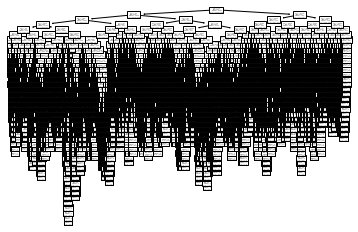

In [18]:
from sklearn import tree

tree.plot_tree(model) #membuat model

In [19]:
text_representation = tree.export_text(model) #Mengubah data kedalam pickle kemudian diambil datanya
print(text_representation)

|--- feature_0 <= 27.50
|   |--- feature_0 <= 18.50
|   |   |--- feature_3 <= 4186.50
|   |   |   |--- feature_2 <= 19541.50
|   |   |   |   |--- feature_0 <= 10.50
|   |   |   |   |   |--- feature_0 <= 7.50
|   |   |   |   |   |   |--- feature_3 <= 44.50
|   |   |   |   |   |   |   |--- feature_0 <= 6.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 43.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 19.50
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 18.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  18.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- feature_3 >  19.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_3 >  43.50
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 13215.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |  